In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.dates as mdates
import datetime as dt
import mplfinance as mpf
import yfinance as yfin

In [55]:
def save_to_csv(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    yfin.pdr_override()

    df = web.get_data_yahoo(ticker, start, end) # we overided with yfinance
    df.to_csv("Project" + ticker + ".csv") # check if this works, do you need to add file path?

    return df

In [13]:
save_to_csv("NVDA", 2022, 3, 2, 2023, 12, 2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-02,237.559998,244.089996,234.149994,242.199997,241.896271,38964200
2022-03-03,242.619995,243.259995,234.690002,237.139999,236.842621,36509500
2022-03-04,233.839996,236.800003,224.820007,229.360001,229.072357,43141500
2022-03-07,228.169998,230.330002,213.300003,213.520004,213.252258,45082100
2022-03-08,213.089996,223.729996,206.500000,215.139999,214.870209,55746700
...,...,...,...,...,...,...
2023-11-27,478.000000,485.299988,476.519989,482.420013,482.354950,39566200
2023-11-28,482.359985,483.230011,474.730011,478.209991,478.145508,40149100
2023-11-29,483.790009,487.619995,478.600006,481.399994,481.335083,38200500


In [56]:
df = pd.read_csv("ProjectNVDA.csv")

In [57]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-02,237.559998,244.089996,234.149994,242.199997,241.896271,38964200
1,2022-03-03,242.619995,243.259995,234.690002,237.139999,236.842621,36509500
2,2022-03-04,233.839996,236.800003,224.820007,229.360001,229.072357,43141500
3,2022-03-07,228.169998,230.330002,213.300003,213.520004,213.252258,45082100
4,2022-03-08,213.089996,223.729996,206.500000,215.139999,214.870209,55746700


In [58]:
df[["Date", "Close"]]

,Date,Close
0,2022-03-02,242.199997
1,2022-03-03,237.139999
2,2022-03-04,229.360001
3,2022-03-07,213.520004
4,2022-03-08,215.139999
...,...,...
437,2023-11-27,482.420013
438,2023-11-28,478.209991
439,2023-11-29,481.399994
440,2023-11-30,467.700012


In [59]:
import matplotlib.pyplot as plt

In [88]:
import csv
from datetime import datetime

timestamp = []
price = []
with open("ProjectNVDA.csv", 'r') as file:
    df = csv.reader(file)
    next(df)
    for line in df:
        timestamp.append(datetime.strptime(line[0], "%Y-%m-%d"))
        price.append(float(line[1]))

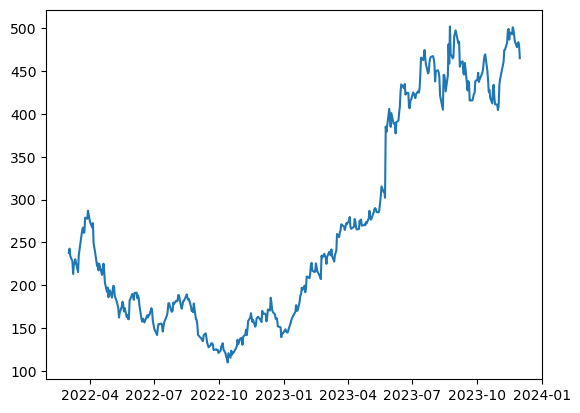

In [74]:
plt.plot(timestamp, price)

Use RMSE, and MAPE

In [84]:
test_window = np.array(price[0:5])
window_size = 3

i = 0

moving_averages = []

while i < len(test_window) - window_size + 1:
    window_average = round(np.sum(test_window[i:i+window_size]) / window_size, 2)
    
    moving_averages.append(window_average)
    
    i+=1
    

print(moving_averages)
    
    
    

[238.01, 234.88, 225.03]


In [81]:
test_window

array([237.55999756, 242.61999512, 233.83999634, 228.16999817,
       213.08999634])

In [89]:
timestamp[0:5]

[datetime.datetime(2022, 3, 2, 0, 0),
 datetime.datetime(2022, 3, 3, 0, 0),
 datetime.datetime(2022, 3, 4, 0, 0),
 datetime.datetime(2022, 3, 7, 0, 0),
 datetime.datetime(2022, 3, 8, 0, 0)]

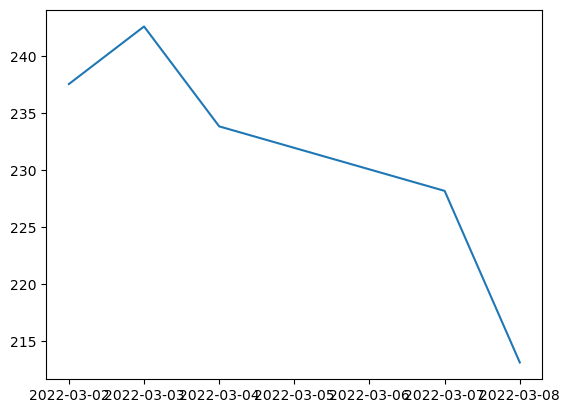

In [90]:
plt.plot(timestamp[0:5], test_window)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(timestamp[0:5], test_window)

In [98]:
from sklearn.linear_model import LinearRegression



TypeError: float() argument must be a string or a real number, not 'datetime.datetime'